In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import tabulate as tb
from statsmodels.distributions.empirical_distribution import ECDF
from IPython.display import display, Markdown, HTML

# Domácí úkol: Vyvolávání srážek
## Autoři: Ondřej Šodek, Roman Hodulák, Petr Bureš

Dokáže ošetření mračen jodidem stříbrným (AgI) zvýšit objem vyprodukovaných srážek? V náhodném experimentu provedli výzkumní pracovníci měření objemu srážek (v jednotce acre-feet) v cílové oblasti po dobu 26 dnů s ošetřením a 26 dalších dnů bez ošetření.

## Velikost vzorku
- Ošetřeno: 26
- Neošetřeno: 26

Vzhledem k relativně malému vzorku dat nemusí být výsledky velmi přesné.

## Úkol 1: Odhad střední hodnoty, mediánu a rozptylu
V této části načteme data z příslušného zdroje (CSV soubor) a určíme výše zmíněné bodové odhady.

In [2]:
# Load data from the source
data = pd.read_csv('data.csv', delimiter=';')

unseeded = data[data['Treatment'] == 'Unseeded']
seeded = data[data['Treatment'] == 'Seeded']

data_key = 'Rainfall'
unseeded_raw = list(unseeded[data_key])
seeded_raw = list(seeded[data_key])

_ = data.groupby('Treatment')
df = pd.DataFrame(pd.concat([_.mean(), _.var(), _.median()], ignore_index=True, axis=1))

# Add labels and translate english strings
df = df.rename(index={'Seeded': 'Ošetřeno', 'Unseeded': 'Neošetřeno'})
df.index.names = ['Skupina']
df.columns=["Střední hodnota", "Rozptyl", "Medián"]

pd.options.display.float_format = '{:.2f}'.format

display(df)

Střední hodnota   Rozptyl  Medián
Skupina                                      
Ošetřeno             441.98 423523.96  221.60
Neošetřeno           164.59  77521.26   44.20

## Úkol 2: Odhad hustoty a distribuční funkce
Zakreslíme hustotu objemu srážek do histogramu, rozdělenou po intervalech šířky 250 acre-feet. Tento histogram tedy zachycuje, kolik hodnot vůči celku spadá do daných 250 acre-feet širokých intervalů. Pomocí těchto "vah" odhadneme funkci hustoty.

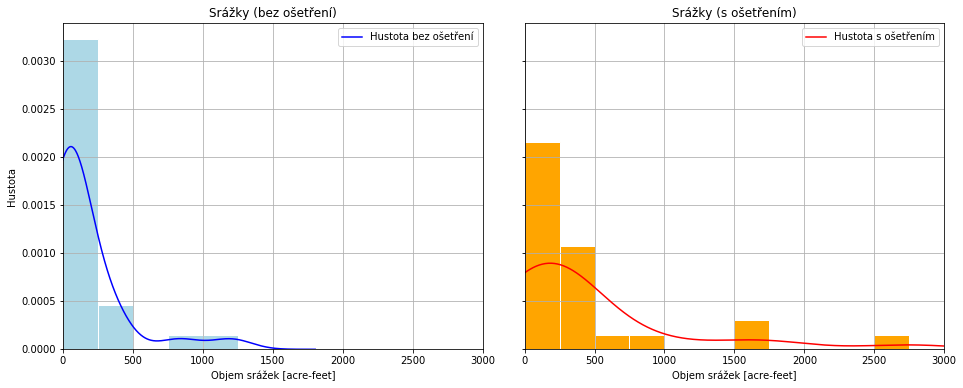

In [3]:
my_bins = [ x * 250 for x in range(13) ]

def setup_axes(axes=None, title=None, xlabel=None, ylabel=None, xlim=None, ylim=None, grid=True, legend=None):
    if xlabel: axes.set_xlabel(xlabel)
    if ylabel: axes.set_ylabel(ylabel)
    if legend: axes.legend(legend)
    if title: axes.set_title(title)
    if xlim: axes.set_xlim(xlim)
    if ylim: axes.set_ylim(ylim)
    axes.grid(grid)

# Rainfall (unseeded) histogram and density
fig, (axes1, axes2) = plt.subplots(1, 2, sharey=True, figsize=(18, 6))

unseeded_axes = unseeded.plot.kde(color='blue', ax=axes1, xlim=(0, 3000))
unseeded.hist(ax=unseeded_axes, density=True, bins=my_bins, color='lightblue', edgecolor='white')

setup_axes(
    unseeded_axes,
    title="Srážky (bez ošetření)",
    xlabel="Objem srážek [acre-feet]",
    ylabel="Hustota",
    xlim=(0, 3000),
    legend=['Hustota bez ošetření']
)

# Rainfall (seeded) histogram and density
seeded_axes = seeded.plot.kde(color='red', ax=axes2)
seeded.hist(ax=seeded_axes, density=True, bins=my_bins, color='orange', edgecolor='white')

setup_axes(
    seeded_axes,
    title="Srážky (s ošetřením)",
    xlabel="Objem srážek [acre-feet]",
    ylabel="Hustota",
    xlim=(0, 3000),
    legend=['Hustota s ošetřením']
)

plt.subplots_adjust(wspace=0.1, left=0.22)

Díky tomu, že nejčastější objem srážek je v rozmezí 0-250 acre-feet, funkce hustoty by nám částečně dávala kladné hodnoty i pro záporná x. Avšak záporné hodnoty objemu srážek nemá smysl uvažovat, rozhodli jsme se tedy graf omezit od 0. Pro porovnání zakreslíme naše odhady hustoty ještě jednou, oba do jednoho grafu.

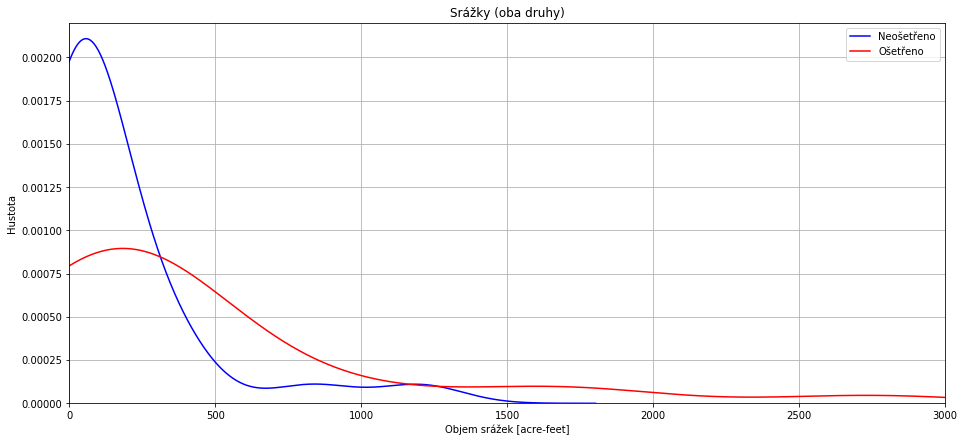

In [4]:
# Rainfall density overlay
axes = unseeded.plot.kde(color='blue', figsize=(16, 7))
seeded.plot.kde(ax=axes, color='red')

setup_axes(
    axes,
    title="Srážky (oba druhy)",
    xlabel="Objem srážek [acre-feet]",
    ylabel="Hustota",
    xlim=(0, 3000),
    ylim=(0, 0.0022),
    legend=['Neošetřeno', 'Ošetřeno']
)

plt.subplots_adjust(wspace=0.1, left=0, right=0.76)

Dále pro obě skupiny zakreslíme empirické distribuční funkce jako odhad jejich distribučních funkcí. Z předchozího výsledku můžeme očekávat od počátku velmi strmý kladný sklon, který postupně klesá, jak se jejich hodnoty blíží k 1. Obě skupiny zakreslíme do jednoho grafu.

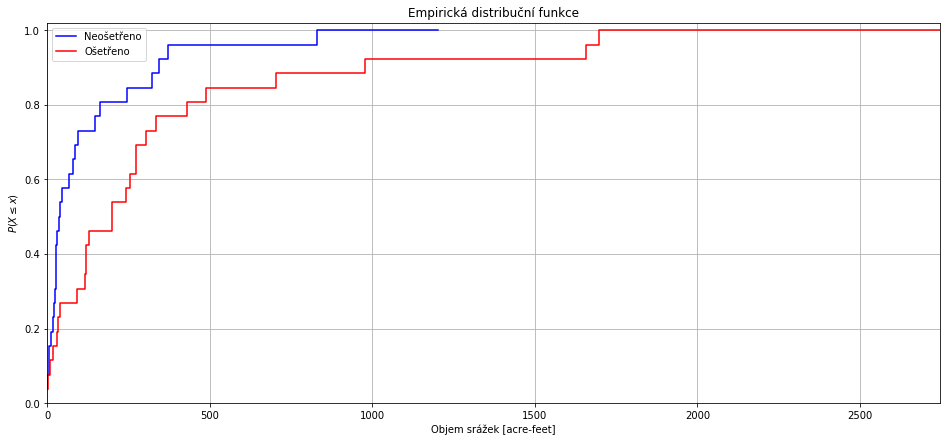

In [5]:
# Cumulative distributions
unseeded_ecdf, seeded_ecdf = ECDF(unseeded_raw), ECDF(seeded_raw)

f, axes = plt.subplots(figsize=(16, 7))
axes.step(unseeded_ecdf.x, unseeded_ecdf.y, color='blue')
axes.step(seeded_ecdf.x, seeded_ecdf.y, color='red')

setup_axes(
    axes,
    title="Empirická distribuční funkce",
    xlabel="Objem srážek [acre-feet]",
    ylabel="$P(X \leq x)$",
    xlim=(0, np.max([unseeded_ecdf.x, seeded_ecdf.x])),
    ylim=(0, 1.02),
    legend=['Neošetřeno', 'Ošetřeno']
)

## Úkol 3: Odhad nejbližšího rozdělení
Zakreslíme znovu histogram zároveň s grafem normálního, exponenciálního a rovnoměrného rozdělení. Parametry necháme zvolit software tak, aby co nejvíce vypovídaly naměřeným datům. Z dosavadních výsledků můžeme očekávat, že rovnoměrné rozdělení bude zcela mimo.

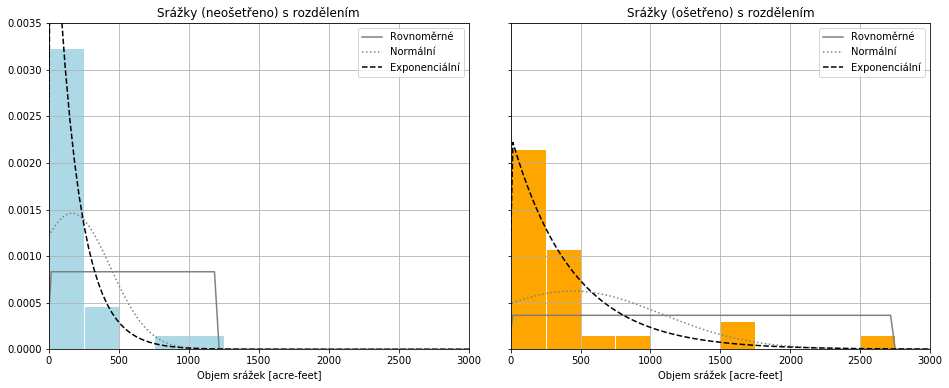


## Zvolené parametry
| Rozdělení                      | Parametr  | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Neošetřeno | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Ošetřeno |
|--------------------------------|-----------|---------------|-------------|
| Rovnoměrné ~ $U(a, b)$         | $a$       | $1.00$      | $4.10$    |
| &nbsp;                             | $b$       | $1202.60$      | $2745.60$    |
| Normální ~ $N(\mu, \sigma^2)$  | $\mu$     | $164.59$      | $441.98$    |
| &nbsp;                             | $\sigma$  | $273.02$      | $638.15$    |
| Exponenciální ~ $Exp(\lambda)$ | $\lambda$ | $0.00611$      | $0.00228$    |


In [6]:
def fit_all(axes, fitted_data):
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    ## Uniform distribution
    a, nscale = ss.uniform.fit(fitted_data)
    b = a + nscale
    p = ss.uniform.pdf(x, a, nscale)
    p_unif = axes.plot(x, p, color='gray', linestyle='-')

    ## Normal distribution
    mu, sigma = ss.norm.fit(fitted_data)
    p = ss.norm.pdf(x, mu, sigma)
    p_norm = axes.plot(x, p, color='gray', linestyle=':')

    ## Exponential distribution
    nloc, nscale = ss.expon.fit(fitted_data)
    ex_lambda = 1 / nscale
    p = ss.expon.pdf(x, nloc, nscale)
    p_exp = axes.plot(x, p, color='black', linestyle='--')
    
    # Return parameters of the distributions
    return (a, b), ex_lambda, (mu, sigma)

fig, (axes_unseeded, axes_seeded) = plt.subplots(1, 2, sharey=True, figsize=(18, 6))

# Rainfall histogram fitting
unseeded.hist(ax=axes_unseeded, density=True, bins=my_bins, color='lightblue', edgecolor='white')
seeded.hist(ax=axes_seeded, density=True, bins=my_bins, color='orange', edgecolor='white')

unseeded_uni, unseeded_ex, unseeded_norm = fit_all(axes_unseeded, unseeded_raw)
seeded_uni, seeded_ex, seeded_norm = fit_all(axes_seeded, seeded_raw)

setup_axes(
    axes_unseeded,
    title="Srážky (neošetřeno) s rozdělením",
    xlabel="Objem srážek [acre-feet]",
    xlim=(0, 3000),
    ylim=(0, 0.0035),
    legend=['Rovnoměrné', 'Normální', 'Exponenciální']
)
setup_axes(
    axes_seeded,
    title="Srážky (ošetřeno) s rozdělením",
    xlabel="Objem srážek [acre-feet]",
    xlim=(0, 3000),
    ylim=(0, 0.0035),
    legend=['Rovnoměrné', 'Normální', 'Exponenciální']
)
plt.subplots_adjust(wspace=0.1, left=0.22)
plt.show()

# Parameters table
nbsp = "&nbsp;"
display(Markdown("""
## Zvolené parametry
| Rozdělení                      | Parametr  | {} Neošetřeno | {} Ošetřeno |
|--------------------------------|-----------|---------------|-------------|
| Rovnoměrné ~ $U(a, b)$         | $a$       | ${:.2f}$      | ${:.2f}$    |
| {}                             | $b$       | ${:.2f}$      | ${:.2f}$    |
| Normální ~ $N(\mu, \sigma^2)$  | $\mu$     | ${:.2f}$      | ${:.2f}$    |
| {}                             | $\sigma$  | ${:.2f}$      | ${:.2f}$    |
| Exponenciální ~ $Exp(\lambda)$ | $\lambda$ | ${:.5f}$      | ${:.5f}$    |
""".format(
    nbsp * 10, nbsp * 10,
    unseeded_uni[0], seeded_uni[0],
    nbsp, unseeded_uni[1], seeded_uni[1],
    unseeded_norm[0], seeded_norm[0],
    nbsp, unseeded_norm[1], seeded_norm[1],
    unseeded_ex, seeded_ex
)))

Z grafů je jasně vidět, že pro obě skupiny exponenciální rozdělení odpovídá našim datům nejlépe, normální rozdělení zachycuje počáteční skok jen velmi zhruba a rovnoměrné rozdělení se pro naše data vůbec nehodí.

## Úkol 4: Náhodný výběr
Jako nejbližší rozdělení jsme zvolili exponenciální. Z tohoto rozdělení (se stejným parametrem $\lambda$, v kódu níže `nscale` = $\frac{1}{\lambda}$) náhodně vybereme 100 hodnot a vykreslíme do histogramu hustoty, zároveň s histogramem z naměřených hodnot pro porovnání.

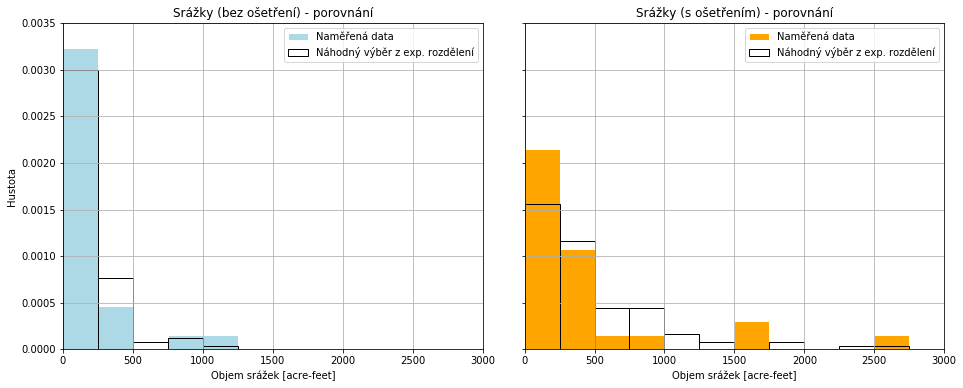

In [7]:
def add_gen_data(axes, fitted_data):
    nloc, nscale = ss.expon.fit(fitted_data)
    s = np.random.exponential(nscale, 100)
    axes.hist(s, density=True, bins=my_bins, color='#00000000', edgecolor='black')

# Rainfall (unseeded) VS randomly generated
fig, (axes_unseeded, axes_seeded) = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
unseeded.hist(ax=axes_unseeded, density=True, bins=my_bins, color='lightblue', edgecolor='white')

add_gen_data(axes_unseeded, unseeded_raw)

setup_axes(
    axes_unseeded,
    title="Srážky (bez ošetření) - porovnání",
    xlabel="Objem srážek [acre-feet]",
    ylabel="Hustota",
    legend=['Naměřená data', 'Náhodný výběr z exp. rozdělení'],
    xlim=(0, 3000),
    ylim=(0, 0.0035)
)

# Rainfall (seeded) VS randomly generated
seeded.hist(ax=axes_seeded, density=True, bins=my_bins, color='orange', edgecolor='white')

add_gen_data(axes_seeded, seeded_raw)

setup_axes(
    axes_seeded,
    title="Srážky (s ošetřením) - porovnání",
    xlabel="Objem srážek [acre-feet]",
    legend=['Naměřená data', 'Náhodný výběr z exp. rozdělení'],
    xlim=(0, 3000),
    ylim=(0, 0.0035)
)

plt.subplots_adjust(wspace=0.1, left=0.22)

Vidíme, že náhodný výběr z exponenciálního rozdělení relativně blízko odpovídá naměřeným hodnotám, pro skupinu bez ošetření o něco blíže, než s ošetřením.

## Úkol 5: Interval spolehlivosti střední hodnoty
Vypočítáme 95% interval spolehlivosti, přičemž neznáme přesný rozptyl, ale pouze jeho bodový odhad. K výpočtu tedy využijeme Studentovo t-rozdělení.

In [8]:
def mean_confidence_interval(data, confidence=0.95):
    nloc, nscale = ss.expon.fit(data)
    mean = np.mean(data)
    return mean, ss.t.interval(confidence, len(data) - 1, loc=mean, scale=ss.sem(data))

unseeded_mean, unseeded_confidence = mean_confidence_interval(unseeded_raw)
seeded_mean, seeded_confidence = mean_confidence_interval(seeded_raw)

# Draw as table using pandas dataframe
df = pd.DataFrame.from_dict({
    'Ošetřeno': [seeded_mean, '({:.2f}, {:.2f})'.format(seeded_confidence[0], seeded_confidence[1])],
    'Neošetřeno': [unseeded_mean, '({:.2f}, {:.2f})'.format(unseeded_confidence[0], unseeded_confidence[1])],
}, orient='index')

# Add labels
df.index.names = ['Skupina']
df.columns=['Průměr', 'Konfidenční 95% interval']

display(df)

Průměr Konfidenční 95% interval
Skupina                                    
Ošetřeno    441.98         (179.13, 704.84)
Neošetřeno  164.59          (52.13, 277.05)

## Úkol 6: Testování hypotéz - střední hodnota je K
Testujeme hypotézu na 5% hladině významnosti, že pro každou skupinu zvlášť je střední hodnota rovna $K$ (den narození reprezentanta, tj. 20). Alternativní hypotéza říká, že se liší v jednom či druhém směru, tedy nechť:

\begin{align}
X & \text{ je náhodná veličina značící "objem srážek neošetřených mračen"} \\
Y & \text{ je náhodná veličina značící "objem srážek ošetřených mračen"} \\
 K &= 20 \\
 \alpha &= 0.05 \\
H_0 &: EX = K \\
H_A &: EX \neq K \\
H'_0 &: EY = K \\
H'_A &: EY \neq K \\
\end{align}

K otestování využijeme jednovýběrový Studentův t-test.

In [9]:
def mean_test_wrapper(data, title, K, alpha=0.05):
    _, pvalue = ss.ttest_1samp(data, popmean=K)
    symbol = '<' if pvalue < alpha else '\\geq'

    display(Markdown("### " + title))
    display(Markdown("$p$-hodnota $= {:.3f} \\implies p$-hodnota ${} \\alpha$".format(pvalue, symbol)))

K = 20
alpha = 0.05

mean_test_wrapper(unseeded_raw, "Srážky (bez ošetření)", K, alpha)
mean_test_wrapper(seeded_raw, "Srážky (s ošetřením)", K, alpha)    

### Srážky (bez ošetření)

$p$-hodnota $= 0.014 \implies p$-hodnota $< \alpha$

### Srážky (s ošetřením)

$p$-hodnota $= 0.003 \implies p$-hodnota $< \alpha$

V obou případech byla $p$-hodnota menší než $\alpha$ (5%), z toho plyne, že $H_0$ a $H'_0$ se zamítá ve prospěch alternativ $H_A$ a $H'_A$ s možnou 5% pravděpodobností chyby.

## Úkol 7: Testování hypotéz - střední hodnoty obou skupin se rovnají
Testujeme hypotézu na 5% hladině významnosti, zda-li se střední hodnoty obou skupin rovnají (rozdíl jejich středních hodnot je 0 s možnou malou bezvýznamnou odchylkou) nebo se významně liší (rozdíl jejich středních hodnot je statisticky významný). K otestování využijeme dvouvýběrový Studentův t-test s tím, že skupiny nemají stejný odhadovaný rozptyl (viz. [úkol 1](#Úkol-1:-Odhad-střední-hodnoty,-mediánu-a-rozptylu)), tedy nechť:

\begin{align}
X & \text{ je náhodná veličina značící "objem srážek neošetřených mračen"} \\
Y & \text{ je náhodná veličina značící "objem srážek ošetřených mračen"} \\
 \alpha &= 0.05 \\
H_0 &: EX = EY \\
H_A &: EX \neq EY \\
\end{align}

In [10]:
alpha = 0.05

# Groups don't have the same variance -> equal_var=False
_, pvalue = ss.ttest_ind(unseeded_raw, seeded_raw, equal_var=False)

_ = '<' if pvalue < alpha else '\\geq'
display(Markdown("$p$-hodnota $= {:.2g} \\implies p$-hodnota ${} \\alpha$".format(pvalue, _)))

$p$-hodnota $= 0.054 \implies p$-hodnota $\geq \alpha$

Protože $p$-hodnota je vyšší než $\alpha$ (5%), hypotéza $H_0$ se nezamítá. Na základě našich dat nejsme schopni prokázat významný rozdíl středního objemu srážek ošetřených a neošetřených mračen.